[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/169rmtyEwRg4YXrWxkpUfssPbWaAQpnxK)

No aprendizado de máquina e na estatística, a seleção de recursos, também conhecida como seleção de variáveis, seleção de atributos ou seleção de subconjuntos de variáveis, é o processo de seleção de um subconjunto de recursos relevantes (variáveis, preditores) para uso na construção do modelo.

 As técnicas de seleção de recursos são usadas por vários motivos:
     * simplificação de modelos para facilitar a interpretação por pesquisadores / usuários;
     * tempo de treinamento mais curto;
     * reduz o processo de overfitting

## O que seria selecionar parâmetros?

Parâmetros Selecionados com a utilização de filtros, podem ser usados como entrada de qualquer modelo de machine learning.

Os métodos se diferem aos tipos de dados:

Univariado   -> Análise de cada variável separadamente

Bivariado    -> Método de análise de duas variáveis (causa/efeito)

Multivariado -> Métodos de análise de relações de múltiplas variáveis dependentes ou independentes

## Qual o melhor Método?

Como tudo na vida, não existe o modelo perfeito mas o que se adequa melhor aos seus dados. Como cientista de dados, uma de nossas 
funções é testar o máximo de hipóteses para melhorar o desempenho geral do aprendizado, evitando o overfitting e estudando a relaçao
os dados sempre da melhor forma.

## Download dos Dados
* https://github.com/philipesantos136/Portfolio/tree/master/Feature-Selection

O Objetivo principal dessa base de dados é criar um modelo que prevê disponibilização de crédito para os clientesdo banco, os que tiveram como TARGET = 1, são os que preencheram o requisito de liberação de crédito.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

In [3]:
from sklearn import metrics
from imblearn.under_sampling import RandomUnderSampler
!pip install -q scikit-plot
import scikitplot as skplt

Using TensorFlow backend.


In [4]:
data = pd.read_csv('santander.csv', nrows = 20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


0    19187
1      813
Name: TARGET, dtype: int64

Conseção de Crédito representam 4.06% Do Dataset.



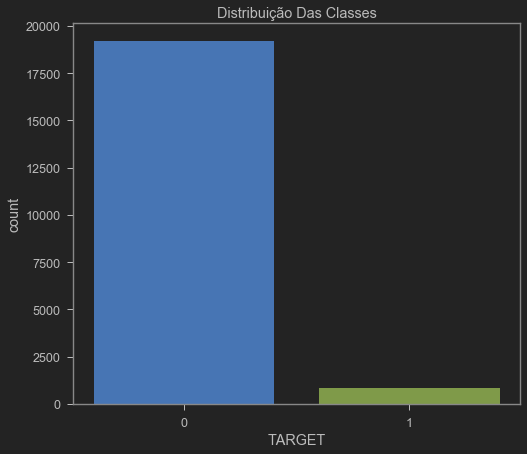

In [5]:
# checando a distribuição da variável alvo
print(data.TARGET.value_counts())
print("\nConseção de Crédito representam {:.2f}% Do Dataset.\n".format((data[data.TARGET == 1].shape[0] / data.shape[0]) * 100))

# plotando gráfico de barras
fig, ax = plt.subplots()
sns.countplot('TARGET', data=data, ax=ax)
ax.set_title('Distribuição Das Classes')
plt.plot()
plt.savefig('original_dist.png')

In [6]:
X = data.drop('TARGET', axis = 1)
y = data['TARGET']

X.shape, y.shape

((20000, 370), (20000,))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

## Balanceando os Dados

1    569
0    569
Name: TARGET, dtype: int64


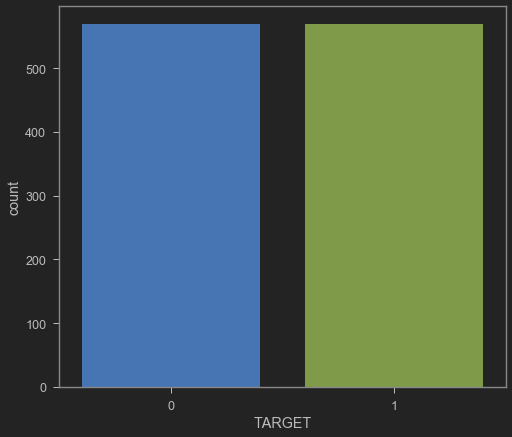

In [8]:
# aplicando o UnderSampler
rus = RandomUnderSampler()
X_rus_train, y_rus_train = rus.fit_sample(X_train, y_train)

# checando o balanceamento das classes
print(pd.Series(y_rus_train).value_counts())

# plotando a nova distribuição das classes
sns_plot = sns.countplot(y_rus_train);
plt.savefig("balanced.png")

### Remoção de parâmetros constantes

In [9]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_rus_train)

VarianceThreshold(threshold=0)

In [10]:
#Parâmetros constantes
constant_filter.get_support().sum()

239

In [11]:
#Removendo os parâmetros constantes
X_train_filter = constant_filter.transform(X_rus_train)
X_test_filter = constant_filter.transform(X_test)

X_train_filter.shape, X_test_filter.shape, X_train.shape

((1138, 239), (6000, 239), (14000, 370))

## Remoção de Parâmetros Semi-Constantes

In [12]:
quasi_constant_filter = VarianceThreshold(threshold=0.01)

In [13]:
quasi_constant_filter.fit(X_train_filter)

VarianceThreshold(threshold=0.01)

In [14]:
#Parâmetros Semi-constantes
quasi_constant_filter.get_support().sum()

210

In [15]:
#Removendo os parâmetros Semi-constantes
X_train_quasi_filter = quasi_constant_filter.transform(X_train_filter)
X_test_quasi_filter = quasi_constant_filter.transform(X_test_filter)

X_train_quasi_filter.shape, X_test_quasi_filter.shape

((1138, 210), (6000, 210))

## Parâmetros Duplicados

In [16]:
X_train_T = X_train_quasi_filter.T
X_test_T = X_test_quasi_filter.T

In [17]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [18]:
X_train_T.shape, X_test_T.shape

((210, 1138), (210, 6000))

In [19]:
#Duplicados
X_train_T.duplicated().sum()

26

In [20]:
duplicated_features = X_train_T.duplicated()

In [21]:
#Selecionando os Parâmetros que devem ficar ou não
features_to_keep = [not index for index in duplicated_features]

In [22]:
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [23]:
X_train_unique.shape, X_train.shape

((1138, 184), (14000, 370))

## Criando modelo e comparando as performances

In [24]:
def run_randomForest(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print("Classification Report")
    print(metrics.classification_report(y_test, y_pred, labels = [1, 0],digits=4))
    print()

In [25]:
%%time
#Modelo com os dados balanceados
run_randomForest(X_train_unique, X_test_unique, y_rus_train, y_test)

Classification Report
              precision    recall  f1-score   support

           1     0.0997    0.6475    0.1728       244
           0     0.9805    0.7521    0.8512      5756

    accuracy                         0.7478      6000
   macro avg     0.5401    0.6998    0.5120      6000
weighted avg     0.9447    0.7478    0.8237      6000


Wall time: 1.27 s


In [26]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Classification Report
              precision    recall  f1-score   support

           1     0.2857    0.0164    0.0310       244
           0     0.9599    0.9983    0.9787      5756

    accuracy                         0.9583      6000
   macro avg     0.6228    0.5073    0.5049      6000
weighted avg     0.9325    0.9583    0.9402      6000


Wall time: 3.83 s


Fica fácil ver que os dados balanceados e com a seleção de parâmetros mais simples tiveram bons resultados, analisemos:
* A Precisão do modelo diminuiu para casos onde há concessão de crédito, tornando o modelo mais conservador.
* A Sensibilidade (Recall) ficou mais equilibrada e melhorou significativamente para os casos onde há conseção de crédito.

## O que isso quer dizer na prática?

    Com uma precisão menor para os casos positivos de concessão de crédito e um recall balanceado, o modelo será preciso tendo uma menor chance de conceder crédito a quem não deveria, mesmo que o cliente esteja enquadrado para receber o benefício. Isso é um bom resultado. Conceder crédito quando na verdade não deveria, pode ser uma grande perda de dinheiro.

# Conclusões

Ciência de Dados é um campo em expansão, boa parte do tempo de trabalho desse profissional é preparando os dados de maneira correta. Neste projeto, o intuito foi apresentar uma espécie de seleção de parâmetros para o estudo de concessão de crédito.

Como projeto inicial, apenas o método mais simples foi implementado, existem muitos outros, que, na maioria das vezes, se complementam.

Em próximos projetos, podemos implementar os outros modelos (Correlação de Person, X2, Informação Mútua, etc) para estudarmos o que acontece com os dados a cada etapa.

    Obrigado!

## Referências
* Gareth James; Daniela Witten; Trevor Hastie; Robert Tibshirani (2013). An Introduction to Statistical Learning. Springer. p. 204.
* (Burns, 2000; M. Hill & A. Hill, 2000; Thomas & Nelson, 1996). Sin.: Estatística Univariável (Dorsch et al., 2001); Estatística a uma dimensão (Dagnelie, n.d.).
* Estatística Bivariável (Dorsch et al., 2001); Estatística a duas dimensões (Dagnelie, n.d.)
* Estatística Multivariável (Dorsch et al., 2001); Estatística a três ou mais dimensões (Dagnelie, n.d.).

## Sites
* https://en.wikipedia.org/wiki/Feature_selection
* https://alexandreramos.blogs.sapo.pt/7901.html
* https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/